In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, GRU,Embedding
from tensorflow.keras.models import Sequential
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
#Load dataset
with open('next_word_predictor.txt','r') as file:
    data = file.read()

In [3]:
# data = [line for line in data if line.strip() != '']
data

'The sun was shining brightly in the clear blue sky, and a gentle breeze rustled the leaves of the tall trees. People were out enjoying the beautiful weather, some sitting in the park, others taking a leisurely stroll along the riverbank. Children were playing games, and laughter filled the air.\n\nAs the day turned into evening, the temperature started to drop, and the sky transformed into a canvas of vibrant colors. Families gathered for picnics, and the smell of barbecues wafted through the air. It was a perfect day for a picnic by the lake.\n\nIn the distance, you could hear the sound of live music coming from a local band, and people began to gather around the stage to enjoy the performance. The atmosphere was electric, and the music had everyone swaying to the beat.\n\nAs the stars began to twinkle in the night sky, the crowd grew even larger, and the festivities continued well into the night. It was a day filled with joy, laughter, and memories that would last a lifetime.\n\n\nT

In [4]:
def preprocess_text(text):

    #Lowercase
    text = text.lower()
    #stop words initialization
    stop_words = set(stopwords.words('english'))

    #lemmatizer
    lemmatizer = WordNetLemmatizer()

    #Remove stop words and lemmatize
    processed_tokens = []

    #Tokenizer
    tokens = word_tokenize(text)

    # print(tokens)

    for token in tokens:
        lemmatized_token = lemmatizer.lemmatize(token,pos='v')
        if lemmatized_token not in stop_words and lemmatized_token.isalpha():
            processed_tokens.append(lemmatized_token)

    processed_text = ' '.join(processed_tokens)
    return processed_text



In [5]:
#Preprocess the data
processed_data = preprocess_text(data)
processed_data

'sun shin brightly clear blue sky gentle breeze rustle leave tall tree people enjoy beautiful weather sit park others take leisurely stroll along riverbank children play game laughter fill air day turn even temperature start drop sky transform canvas vibrant color families gather picnic smell barbecue waft air perfect day picnic lake distance could hear sound live music come local band people begin gather around stage enjoy performance atmosphere electric music everyone sway beat star begin twinkle night sky crowd grow even larger festivities continue well night day fill joy laughter memories would last lifetime ancient castle stand hill tower spires reach towards sky castle rich history stone wall witness countless battle royal intrigue tourists world flock explore mysteries inside castle could find grand halls adorn magnificent tapestries chandeliers air thick scent history creak old wooden floor echo corridors castle library house impressive collection book date back centuries ventu

In [6]:
#Padding the sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
len(tokenizer.word_index)

4993

In [7]:

input_sequences =[]
for sentence in data.split('\n'):
    
    
    
    tokenised_sentence = tokenizer.texts_to_sequences([sentence])[0]

    for i in range(1,len(tokenised_sentence)):
        input_sequences.append(tokenised_sentence[:i+1])

input_sequences


[[1, 155],
 [1, 155, 21],
 [1, 155, 21, 2368],
 [1, 155, 21, 2368, 1549],
 [1, 155, 21, 2368, 1549, 8],
 [1, 155, 21, 2368, 1549, 8, 1],
 [1, 155, 21, 2368, 1549, 8, 1, 422],
 [1, 155, 21, 2368, 1549, 8, 1, 422, 692],
 [1, 155, 21, 2368, 1549, 8, 1, 422, 692, 215],
 [1, 155, 21, 2368, 1549, 8, 1, 422, 692, 215, 2],
 [1, 155, 21, 2368, 1549, 8, 1, 422, 692, 215, 2, 3],
 [1, 155, 21, 2368, 1549, 8, 1, 422, 692, 215, 2, 3, 2369],
 [1, 155, 21, 2368, 1549, 8, 1, 422, 692, 215, 2, 3, 2369, 1550],
 [1, 155, 21, 2368, 1549, 8, 1, 422, 692, 215, 2, 3, 2369, 1550, 2370],
 [1, 155, 21, 2368, 1549, 8, 1, 422, 692, 215, 2, 3, 2369, 1550, 2370, 1],
 [1, 155, 21, 2368, 1549, 8, 1, 422, 692, 215, 2, 3, 2369, 1550, 2370, 1, 423],
 [1,
  155,
  21,
  2368,
  1549,
  8,
  1,
  422,
  692,
  215,
  2,
  3,
  2369,
  1550,
  2370,
  1,
  423,
  4],
 [1,
  155,
  21,
  2368,
  1549,
  8,
  1,
  422,
  692,
  215,
  2,
  3,
  2369,
  1550,
  2370,
  1,
  423,
  4,
  1],
 [1,
  155,
  21,
  2368,
  1549,
  8

In [8]:
len(input_sequences)

26383

In [9]:
len(tokenizer.word_index)

4993

In [10]:
max_len =max([len(x) for x in input_sequences])
max_len

325

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences,max_len,padding='pre')

X = padded_input_sequences[:,:-1]
y = padded_input_sequences[:,-1]

X,y

(array([[   0,    0,    0, ...,    0,    0,    1],
        [   0,    0,    0, ...,    0,    1,  155],
        [   0,    0,    0, ...,    1,  155,   21],
        ...,
        [   0,    0,    0, ...,   64, 2331,  290],
        [   0,    0,    0, ..., 2331,  290,   19],
        [   0,    0,    0, ...,  290,   19,   54]],
       shape=(26383, 324), dtype=int32),
 array([ 155,   21, 2368, ...,   19,   54, 1535],
       shape=(26383,), dtype=int32))

In [12]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes = len(tokenizer.word_index) + 1)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(26383, 4994))

In [13]:
X,y

(array([[   0,    0,    0, ...,    0,    0,    1],
        [   0,    0,    0, ...,    0,    1,  155],
        [   0,    0,    0, ...,    1,  155,   21],
        ...,
        [   0,    0,    0, ...,   64, 2331,  290],
        [   0,    0,    0, ..., 2331,  290,   19],
        [   0,    0,    0, ...,  290,   19,   54]],
       shape=(26383, 324), dtype=int32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(26383, 4994)))

In [14]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train,y_train

(array([[   0,    0,    0, ..., 2904,  379,    1],
        [   0,    0,    0, ..., 1219,  441,  423],
        [   0,    0,    0, ..., 3411,   88,   79],
        ...,
        [   0,    0,    0, ...,  592, 2487, 2488],
        [   0,    0,    0, ...,   69,    7, 1767],
        [   0,    0,    0, ...,   36, 1145, 4703]],
       shape=(21106, 324), dtype=int32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(21106, 4994)))

In [16]:
len(tokenizer.word_index)

4993

In [17]:
#Building the model

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100))
model.add(LSTM(128))
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))
model.build(input_shape=(None,max_len))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 325, 100)       │       499,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4994)           │       644,226 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,260,874 (4.81 MB)

 Trainable params: 1,260,874 (4.81 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#Train model

history = model.fit(X,y,epochs=30,verbose=1)

Epoch 1/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 202s 239ms/step - accuracy: 0.0566 - loss: 7.0732
Epoch 2/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 204s 247ms/step - accuracy: 0.0766 - loss: 6.4037
Epoch 3/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 195s 237ms/step - accuracy: 0.0939 - loss: 6.0079
Epoch 4/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 195s 237ms/step - accuracy: 0.1152 - loss: 5.6491
Epoch 5/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 198s 232ms/step - accuracy: 0.1347 - loss: 5.3016
Epoch 6/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 188s 228ms/step - accuracy: 0.1534 - loss: 4.9650
Epoch 7/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 189s 229ms/step - accuracy: 0.1750 - loss: 4.6419
Epoch 8/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 192s 233ms/step - accuracy: 0.1982 - loss: 4.3336
Epoch 9/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 198s 228ms/step - accuracy: 0.2270 - loss: 4.0381
Epoch 10/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 201s 226ms/step - accuracy: 0.2646 - loss: 3.7487
Epoch 11/30
825/825 ━━━━━━━━━━━━━━━━━━━━ 190s 230ms/step - accuracy: 0.3079 - loss: 3.4742
Epoch 12

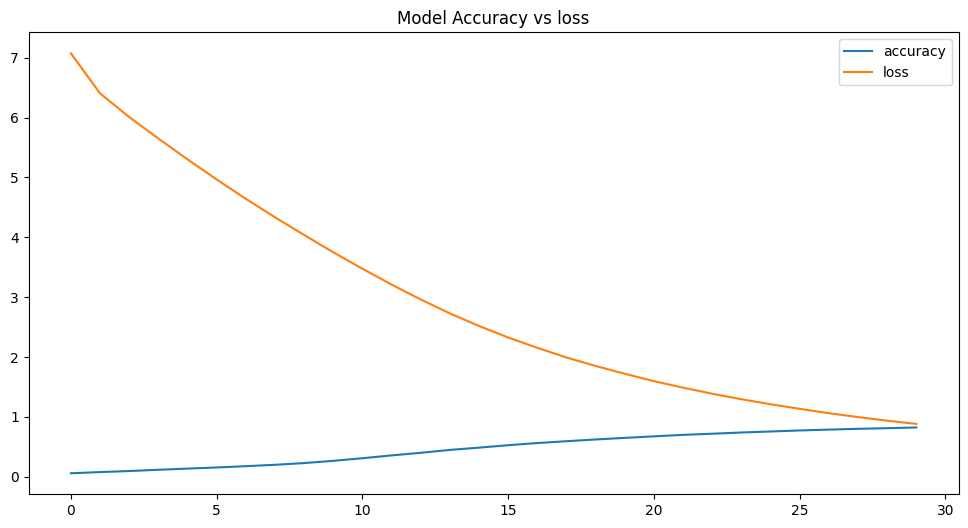

In [23]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Model Accuracy vs loss")
plt.legend(['accuracy','loss'])
plt.yscale('linear')
plt.show()

In [24]:
predictions = model.predict(X_test)
predictions

165/165 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step


array([[9.9749283e-14, 6.3916011e-04, 2.3597784e-06, ..., 7.7323862e-13,
        1.2793370e-12, 2.7015053e-12],
       [3.5225052e-11, 6.6417199e-01, 2.8784586e-07, ..., 4.1062469e-16,
        1.7721003e-17, 9.2845758e-09],
       [1.2314841e-10, 4.5043204e-04, 4.8043006e-07, ..., 2.4848331e-12,
        6.5792742e-15, 1.2360553e-12],
       ...,
       [9.7027941e-10, 9.1726122e-07, 1.0304171e-09, ..., 1.6967586e-10,
        4.3898348e-12, 2.6792131e-06],
       [2.6722202e-14, 6.9187945e-07, 8.5353351e-09, ..., 1.6454342e-14,
        3.0127346e-13, 1.8324164e-15],
       [4.3376032e-14, 6.8795175e-06, 9.9588472e-01, ..., 7.3716806e-16,
        6.2265032e-16, 1.0530607e-22]], shape=(5277, 4994), dtype=float32)

In [25]:
model.input_shape,model.output_shape

((None, 325), (None, 4994))

In [26]:
X_test.shape

(5277, 324)

In [27]:
y_test.shape

(5277, 4994)

In [28]:
X_train.shape,y_train.shape

((21106, 324), (21106, 4994))

In [318]:
import time
text = "I don't care! Game's over!"

for i in range(3):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  print(token_text)
  # padding
  padded_token_text = pad_sequences([token_text], maxlen= 324, padding='post',)
  padded_token_text = np.pad(padded_token_text, ((0, 309), (0, 182 - padded_token_text.shape[1])), mode='constant')
  print(padded_token_text,padded_token_text.shape)
  # result = np.zeros((310, 3752))
  # result[0][0] = token_text
  print(f"Flatenned: {padded_token_text},{padded_token_text.shape}")

  # predict
  # pos = np.argmax(model.predict(padded_token_text),axis=1)
  predictions = model.predict(padded_token_text)
  print(predictions,predictions.shape)
  # pos = np.argmax(predictions,axis=1,keepdims=True)
  pos = np.max(predictions, axis=1, keepdims=True)
  ps2 = np.argmax(predictions, axis=1,keepdims=True)
  print(ps2[0],pos.shape)

  for word,index in tokenizer.word_index.items():
    if index == 1232:
      print(text)
      text = text + " " + word
      time.sleep(2)

[1232]
[[1232    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]] (310, 182)
Flatenned: [[1232    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]],(310, 182)
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
[[9.9318862e-01 2.4911151e-06 1.9587344e-06 ... 2.0145303e-06
  1.4609204e-06 2.9728512e-06]
 [9.9318862e-01 2.4911151e-06 1.9587344e-06 ... 2.0145303e-06
  1.4609204e-06 2.9728512e-06]
 [9.9318862e-01 2.4911151e-06 1.9587344e-06 ... 2.0145303e-06
  1.4609204e-06 2.9728512e-06]
 ...
 [9.9318862e-01 2.4911151e-06 1.9587344e-06 ... 2.0145303e-06
  1.4609204e-06 2.9728512e-06]
 [9.9318862e-01 2.4911151e-06 1.9587344e-06 ... 2.0145303e-06
  1.4609204e-06 2.9728512

In [33]:
import time
text = "I don't care! Game's over!"
for i in range(10):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen= 183, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
I don't care! Game's over! i've
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
I don't care! Game's over! i've been
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
I don't care! Game's over! i've been kinda
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
I don't care! Game's over! i've been kinda like
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
I don't care! Game's over! i've been kinda like a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
I don't care! Game's over! i've been kinda like a viking
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
I don't care! Game's over! i've been kinda like a viking dollars
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
I don't care! Game's over! i've been kinda like a viking dollars and
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
I don't care! Game's over! i've been kinda like a viking dollars and a
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
I don't care! Game's over! i've been kinda like a viking dollars and a football


In [34]:
def predict_values(model,tokenizer,text):
  token_text = tokenizer.texts_to_sequences([text])[0]
  padded_token_text = pad_sequences([token_text], maxlen= 183, padding='pre')
  pos = np.argmax(model.predict(padded_token_text))
  
  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
  return text    


In [35]:
text = "I don't care! Game's over!"
predict_values(model,tokenizer,text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


"I don't care! Game's over! i've"

In [36]:
#Save Model
model.save('next_word_predictor_model.h5')

In [37]:
import pickle

with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)